In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import scipy.signal
import numpy as np
import netCDF4 as nc
import cartopy.feature
import cartopy.crs as ccrs # ccrs
#import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [3]:
lnum=0
FName1 = '/ocean/yingkai/GEOTRACES/Simulations/SPIN06_SET02_1m_20020101_20131231_ptrc_T.nc'
FName2 = '/ocean/yingkai/GEOTRACES/Simulations/SET01_1m_20020101_20131231_ptrc_T.nc'
ptrc_obj1 = nc.Dataset(FName1)
ptrc_obj2 = nc.Dataset(FName2)
nav_lon = ptrc_obj1.variables['nav_lon'][:]
nav_lat = ptrc_obj1.variables['nav_lat'][:]
d18O1 = np.squeeze(ptrc_obj1.variables['d18O'][:, lnum, :, :]); d18O1[d18O1==0]=np.nan
d18O2 = np.squeeze(ptrc_obj2.variables['d18O'][:, lnum, :, :]); d18O2[d18O2==0]=np.nan

/home/yingkai/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


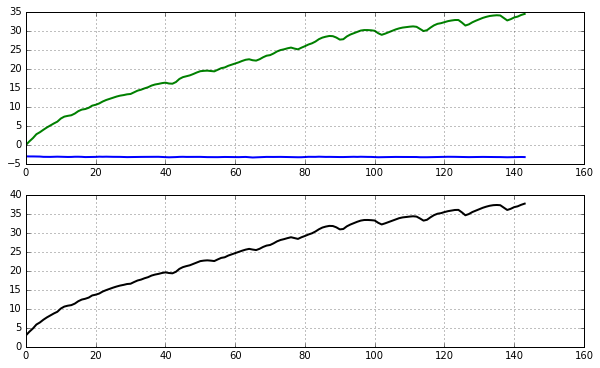

In [4]:
fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(np.nanmean(np.nanmean(d18O1, 1), 1), lw=2)
ax1.plot(np.nanmean(np.nanmean(d18O2, 1), 1), lw=2)
ax2.plot(np.nanmean(np.nanmean(d18O2, 1), 1)-np.nanmean(np.nanmean(d18O1, 1), 1), 'k-', lw=2)

In [ ]:
from dateutil.relativedelta import relativedelta

base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [ ]:
rf_name=glob.glob('_data/Samples/STN-30p/runoff_id_modified.mat')
rf_obj=scipy.io.loadmat(rf_name[0])
rf_id=rf_obj['rf_id']
rf_lon=rf_obj['lon']
rf_lat=rf_obj['lat']
rf_id[rf_id==2]=0 # 0 is Central Arctic